In [58]:
import pandas as pd
import numpy as np

In [134]:
data = pd.read_csv('data/psy_20171027.csv', decimal=',', sep=';', encoding='cp1251')

In [135]:
data.head()

,пол,возраст,Группа,Новизна,Сложность,Нерешенность,Общий,ША,F1,F2,...,UAI,IDV,MAS,LTO,Physical Aggression,Anger,Hostility,ШНвП,"F1,1","F2,1"
0,2,38.0,3,20.0,32.0,11.0,63.0,54.0,26.0,17.0,...,30.0,130.0,170.0,42.0,20.0,26.0,20.0,53.0,17.0,22.0
1,2,39.0,3,23.0,26.0,10.0,59.0,45.0,22.0,14.0,...,45.0,-10.0,-80.0,-48.0,17.0,11.0,11.0,58.0,22.0,25.0
2,1,38.0,3,15.0,27.0,14.0,56.0,47.0,24.0,14.0,...,130.0,100.0,90.0,42.0,22.0,16.0,16.0,56.0,15.0,20.0
3,2,37.0,3,17.0,26.0,13.0,56.0,45.0,31.0,10.0,...,50.0,150.0,-10.0,-88.0,20.0,13.0,12.0,78.0,13.0,20.0
4,2,39.0,3,14.0,35.0,12.0,61.0,52.0,37.0,12.0,...,120.0,60.0,-100.0,42.0,15.0,19.0,26.0,72.0,14.0,19.0


In [136]:
data['пол']=data['пол'].astype('category')

In [137]:
data['Группа']=data['Группа'].astype('category')

In [138]:
data['Новизна'].describe()

count    67.000000
mean     16.776119
std       3.634102
min       4.000000
25%      15.000000
50%      17.000000
75%      19.000000
max      23.000000
Name: Новизна, dtype: float64

In [139]:
df = data
y = data['Physical Aggression']
X = data.drop(['Группа', 'возраст', 'Physical Aggression'], axis=1)

In [140]:
X1 = X
cut_history = {}
for name in X.columns:
    if not X[name].dtype.name is 'category':
        X1[name], info = pd.cut(X[name], bins=3, labels=['low', 'medium', 'high'], retbins =True)
        cut_history[name] = info

In [141]:
X.head()

,пол,Новизна,Сложность,Нерешенность,Общий,ША,F1,F2,Конфронтационный,Дистанцирование,...,PDI,UAI,IDV,MAS,LTO,Anger,Hostility,ШНвП,"F1,1","F2,1"
0,2,high,medium,medium,high,medium,medium,medium,low,high,...,high,medium,high,high,medium,high,medium,medium,medium,medium
1,2,high,medium,medium,medium,low,low,medium,low,high,...,medium,medium,low,low,medium,low,low,medium,high,high
2,1,medium,medium,medium,medium,medium,low,medium,medium,medium,...,low,high,high,medium,medium,low,medium,medium,low,medium
3,2,high,medium,medium,medium,low,medium,low,high,medium,...,low,medium,high,medium,low,low,low,high,low,medium
4,2,medium,high,medium,high,medium,high,low,low,medium,...,medium,medium,medium,low,medium,medium,high,high,low,medium


In [142]:
X2 = pd.get_dummies(X1)

In [143]:
X2

,пол_1,пол_2,Новизна_low,Новизна_medium,Новизна_high,Сложность_low,Сложность_medium,Сложность_high,Нерешенность_low,Нерешенность_medium,...,Hostility_high,ШНвП_low,ШНвП_medium,ШНвП_high,"F1,1_low","F1,1_medium","F1,1_high","F2,1_low","F2,1_medium","F2,1_high"
0,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,0,1,0
5,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
6,0,1,0,1,0,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
7,1,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
8,1,0,0,0,1,1,0,0,0,1,...,1,0,1,0,0,1,0,0,1,0
9,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1


In [145]:
y1 = pd.cut(y, bins=3, labels=['low', 'medium', 'high'])
y1

0     medium
1        low
2     medium
3     medium
4        low
5     medium
6        low
7        low
8     medium
9        low
10      high
11    medium
12       low
13       low
14    medium
15       low
16    medium
17      high
18       low
19    medium
20    medium
21       low
22       low
23    medium
24       low
25    medium
26       low
27    medium
28    medium
29       low
       ...  
37    medium
38    medium
39    medium
40       low
41    medium
42      high
43       low
44       low
45       low
46    medium
47    medium
48       low
49    medium
50      high
51       low
52    medium
53      high
54       low
55    medium
56       low
57    medium
58      high
59       low
60       low
61    medium
62    medium
63    medium
64      high
65    medium
66       low
Name: Physical Aggression, Length: 67, dtype: category
Categories (3, object): [low < medium < high]

In [162]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X2,y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [163]:
model.feature_importances_[3]

0.0

In [196]:
features = []
for i, name in enumerate(X2.columns):
    if model.feature_importances_[i] > 0:
        features.append(name)
        print(name, model.feature_importances_[i])

пол_2 0.0609552691433
ША_medium 0.0801699403662
F2_medium 0.0287239611538
Дистанцирование_low 0.0464883527331
Самоконтроль_low 0.0781438340953
Бегство-избегание_low 0.0423300480162
Бегство-избегание_high 0.0338640384129
Планирование решения проблемы_low 0.0622856420809
UAI_high 0.0414834470559
MAS_low 0.170565225106
LTO_high 0.0253980288097
Anger_low 0.0406368460955
Hostility_high 0.0135456153652
ШНвП_low 0.0253980288097
ШНвП_medium 0.0474096537781
ШНвП_high 0.148984008158
F1,1_high 0.0197540224075
F2,1_low 0.0338640384129


In [184]:
from sklearn import tree
from sklearn.externals.six import StringIO  
import pydot

dot_data = StringIO() 
tree.export_graphviz(model, out_file='out.dot', feature_names=X2.columns,
                     class_names = ['PhysAggr_low', 'PhysAggr_medium', 'PhysAggr_high'],
                     filled=True, 
                     rounded=True) 
#graph = pydot.graph_from_dot_data(dot_data.getvalue())

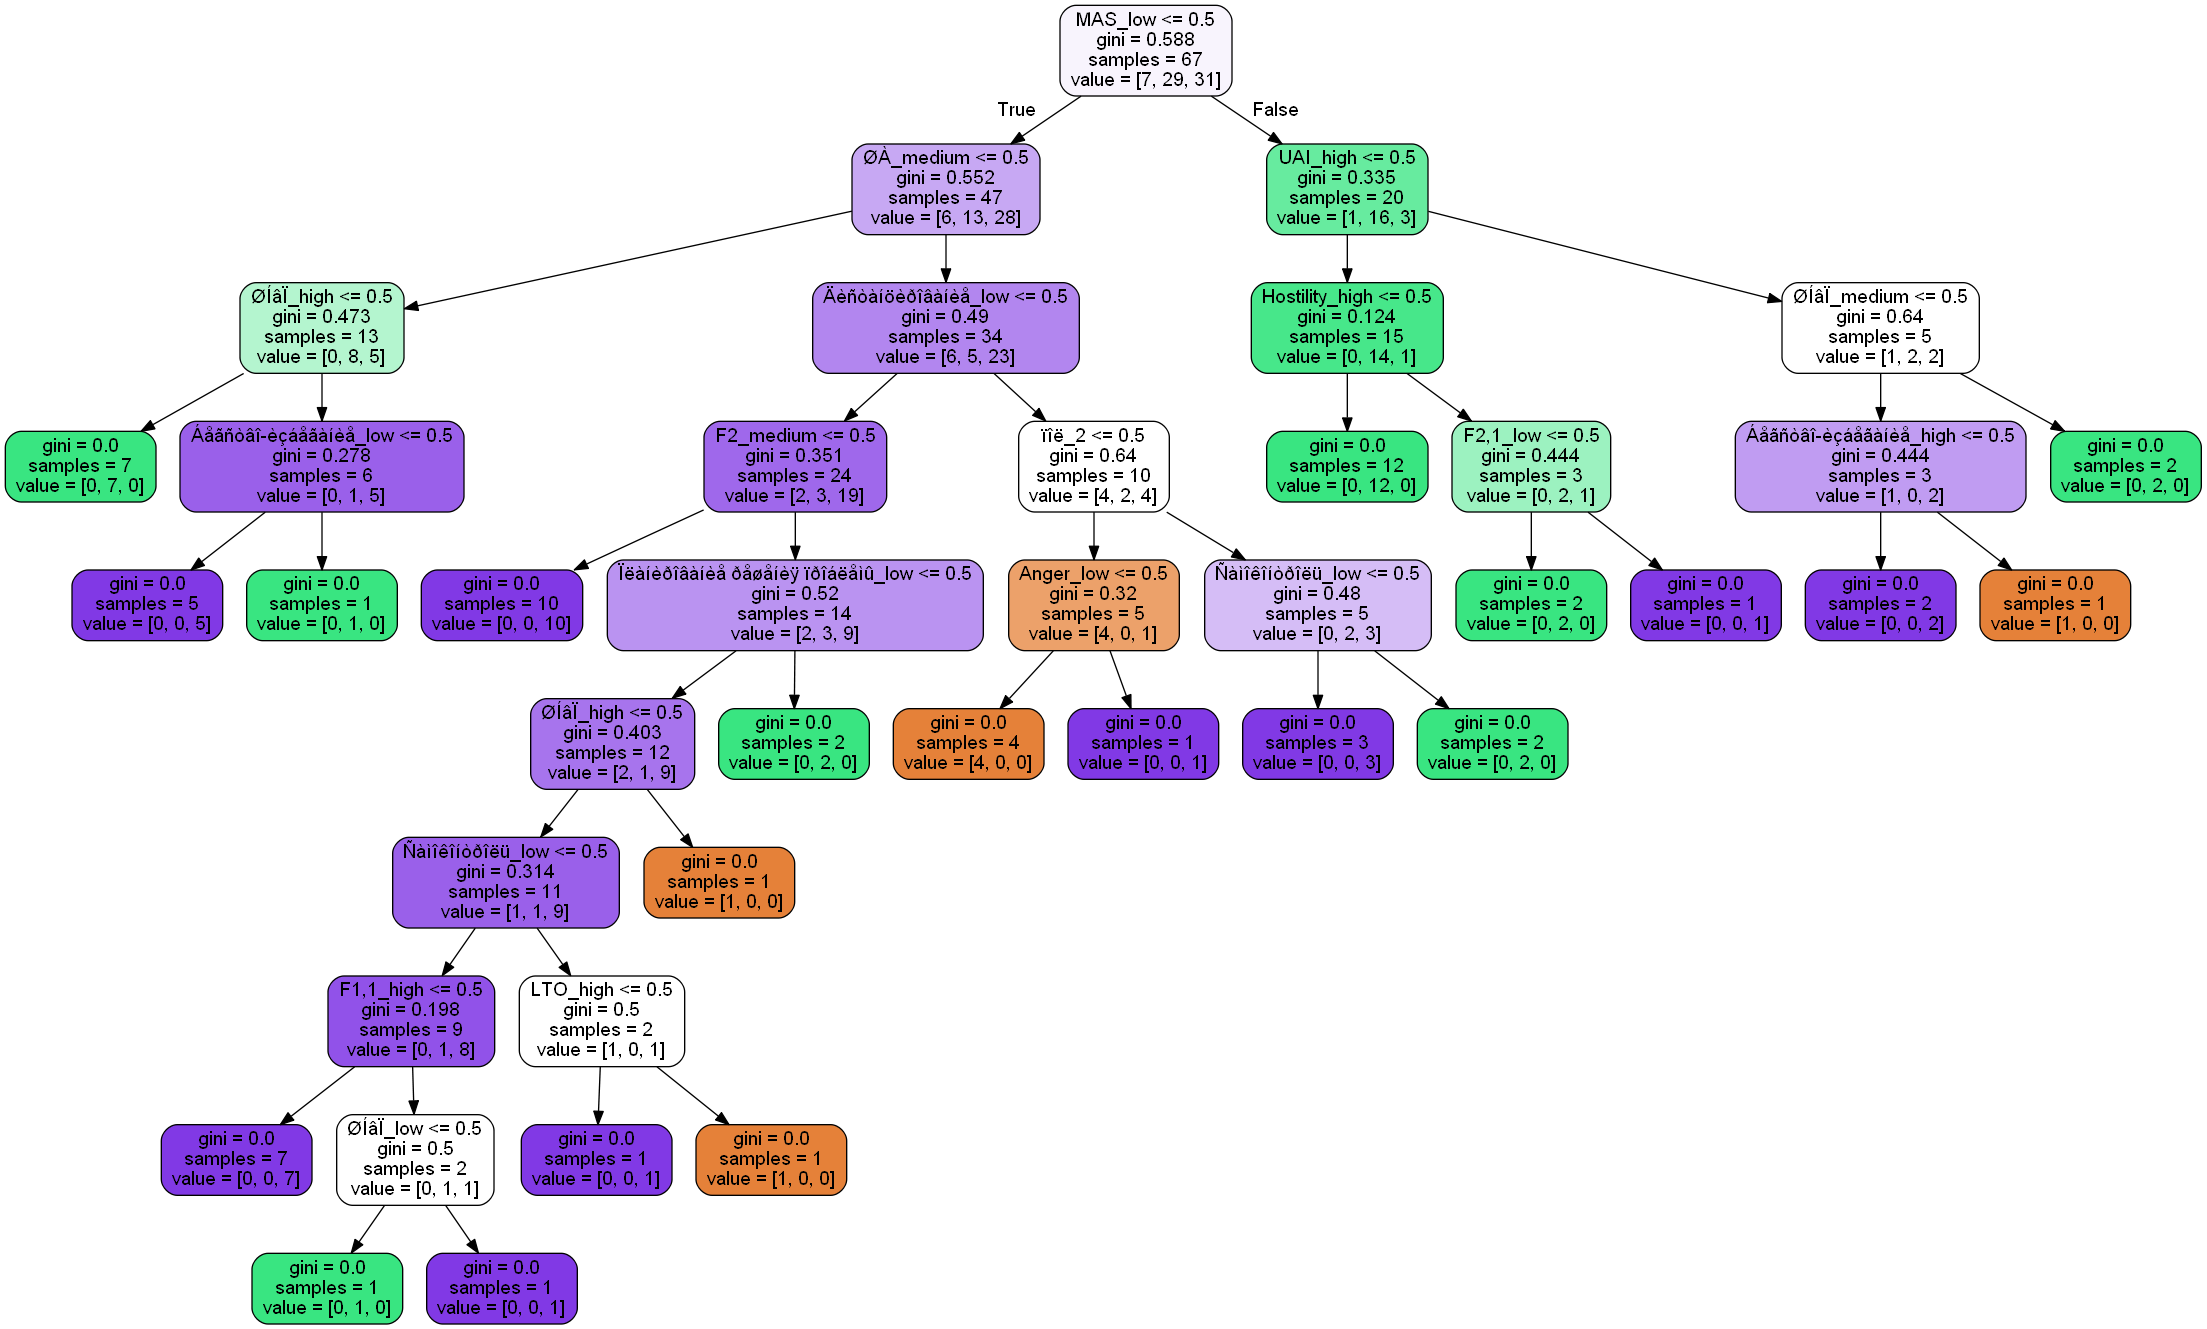

In [179]:
from IPython.display import Image, display

plt = Image(graph[0].create_png())
display(plt)

In [189]:
X.describe()

,пол,Новизна,Сложность,Нерешенность,Общий,ША,F1,F2,Конфронтационный,Дистанцирование,...,PDI,UAI,IDV,MAS,LTO,Anger,Hostility,ШНвП,"F1,1","F2,1"
count,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
unique,2,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,1,high,medium,medium,medium,medium,medium,low,medium,medium,...,medium,medium,medium,medium,medium,medium,medium,medium,medium,medium
freq,36,35,41,39,37,44,36,36,31,31,...,41,38,32,38,40,29,34,35,36,43


In [191]:
model2 = DecisionTreeClassifier()
model2.fit(X,y1)

ValueError: could not convert string to float: 'medium'

In [193]:
from jsm.jsm_analysis import FactBase, search_norris
from aq.aq_description import Fact

In [ ]:
for klass in ['PhysAggr_low', 'PhysAggr_medium', 'PhysAggr_high']:
    print('\n' * 3 + '*' * 5 + 'Start search reasons for class {0}'.format(klass) + '*' * 5)
    print('Start search reasons for class property {0}'.format(klass))
    fb = FactBase(Fact(class_index, {klass}, 'class'))
    fb.build(X2, features)
    fb.clear()

    all_hypothesis = {}


    def _search_in_fb(data_fb, target):
        hypotheses = search_norris(data_fb)
        reasons = []
        for hyp in hypotheses:
            if hyp.value.count() <= max_reason_length:
                reasons.append((hyp.generator.count(),
                                [data_fb.properties[i] for i in range(len(hyp.value)) if
                                 hyp.value[i]]))
        if reasons:
            reasons.sort(key=lambda x: x[0], reverse=True)
            logging.info('\tFound {0} reasons for {1}:\n\t'.format(len(reasons), target) + '\n\t'.join(
                ['[{0}]: '.format(q) + ' & '.join([str(f) for f in r]) for q, r in reasons]))
        else:
            logging.debug('\tWas not found reasons for {0}'.format(target))

        all_hypothesis[target] = hypotheses


    _search_in_fb(fb, 'class ' + klass)
    
    for prop in features:
        print('Start search reasons for property {0}'.format(prop))
        fb = FactBase(prop)
        fb.build(data, class_descriptions[klass])
        fb.clear()

        _search_in_fb(fb, prop)